# Seleção de Features usando Random Forests (Abordagem 1)

## 1. Carregando módulos e dados

In [1]:
# Manipulação dos dados
import numpy  as np
import scipy  as sp
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [19]:
# Carregando os dados
dados = pd.read_csv('../../Dados/abordagem1.csv')

In [23]:
# Pré-processamento de dados
dados.replace(['TB+','TB-','Sim','Não','Branco','Não branco','Positivo','Negativo','ignorado','Masculino','Feminino'],[1,0,1,-1,1,-1,1,-1,0,1,-1],inplace=True)

## 2. Seleção de variáveis utilizando Random forests

In [24]:
from sklearn.ensemble import RandomForestClassifier as RF
clf = RF(n_estimators=10000,max_depth=1,n_jobs=-1)

### One-hot encoding Full

In [25]:
# Separação entre dados e target
y = dados['desfecho'].values
X = dados.drop(['desfecho'],axis=1)

# Fit da árvore
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
valores = zip(list(X.columns),clf.feature_importances_) 

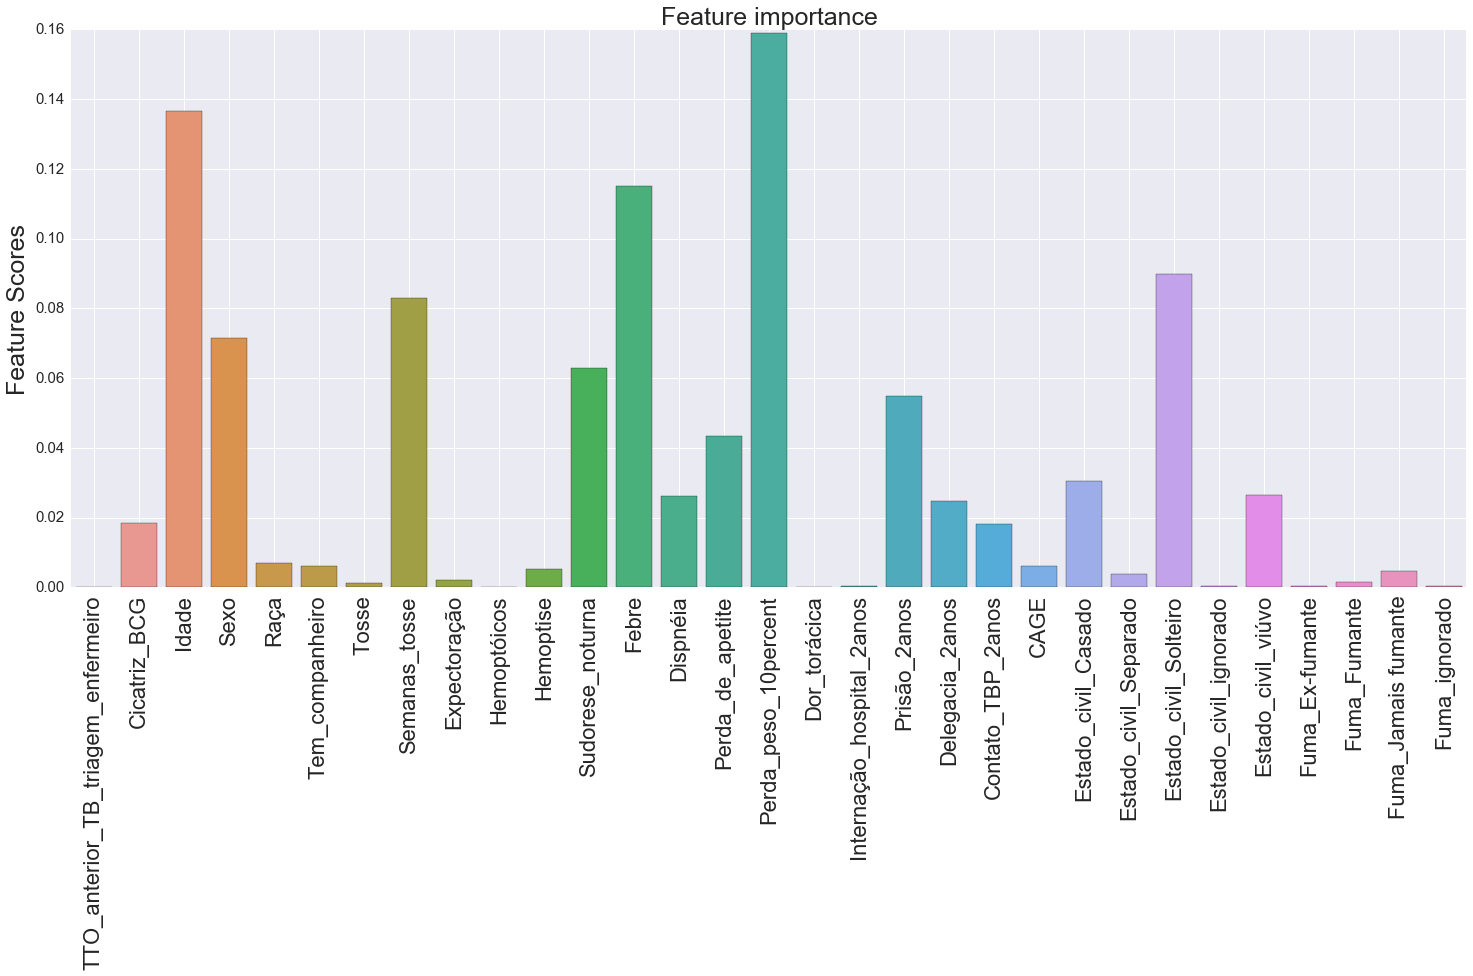

In [27]:
# Plotting
valores = zip(list(X.columns),clf.feature_importances_) 
plt.figure(figsize=(25,10))
sns.barplot(*zip(*valores))
plt.xticks(rotation=90,fontsize=22)
plt.yticks(fontsize=15)
plt.title('Feature importance',fontsize=25)
plt.ylabel('Feature Scores',fontsize=25)
plt.grid(True)
plt.show()

In [29]:
# Reorganizando para a importância
array = (clf.feature_importances_).tolist()
best = sorted(clf.feature_importances_)
best = (best[::-1])

In [30]:
features_full = []
for rank in best:
    features_full.append(X.columns[array.index(rank)])

In [31]:
# Verificando a relevância de cada
for i in range(len(features_full)):
    print(features_full[i],best[i])

Perda_peso_10percent 0.1589
Idade 0.1367
Febre 0.1151
Estado_civil_Solteiro 0.0897
Semanas_tosse 0.083
Sexo 0.0715
Sudorese_noturna 0.0629
Prisão_2anos 0.0548
Perda_de_apetite 0.0433
Estado_civil_Casado 0.0306
Estado_civil_viúvo 0.0266
Dispnéia 0.0262
Delegacia_2anos 0.0248
Cicatriz_BCG 0.0184
Contato_TBP_2anos 0.0181
Raça 0.0069
CAGE 0.0061
Tem_companheiro 0.006
Hemoptise 0.0052
Fuma_Jamais fumante 0.0048
Estado_civil_Separado 0.0037
Expectoração 0.0021
Fuma_Fumante 0.0015
Tosse 0.0013
Internação_hospital_2anos 0.0004
Internação_hospital_2anos 0.0004
Internação_hospital_2anos 0.0004
Fuma_ignorado 0.0003
TTO_anterior_TB_triagem_enfermeiro 0.0001
TTO_anterior_TB_triagem_enfermeiro 0.0001
TTO_anterior_TB_triagem_enfermeiro 0.0001


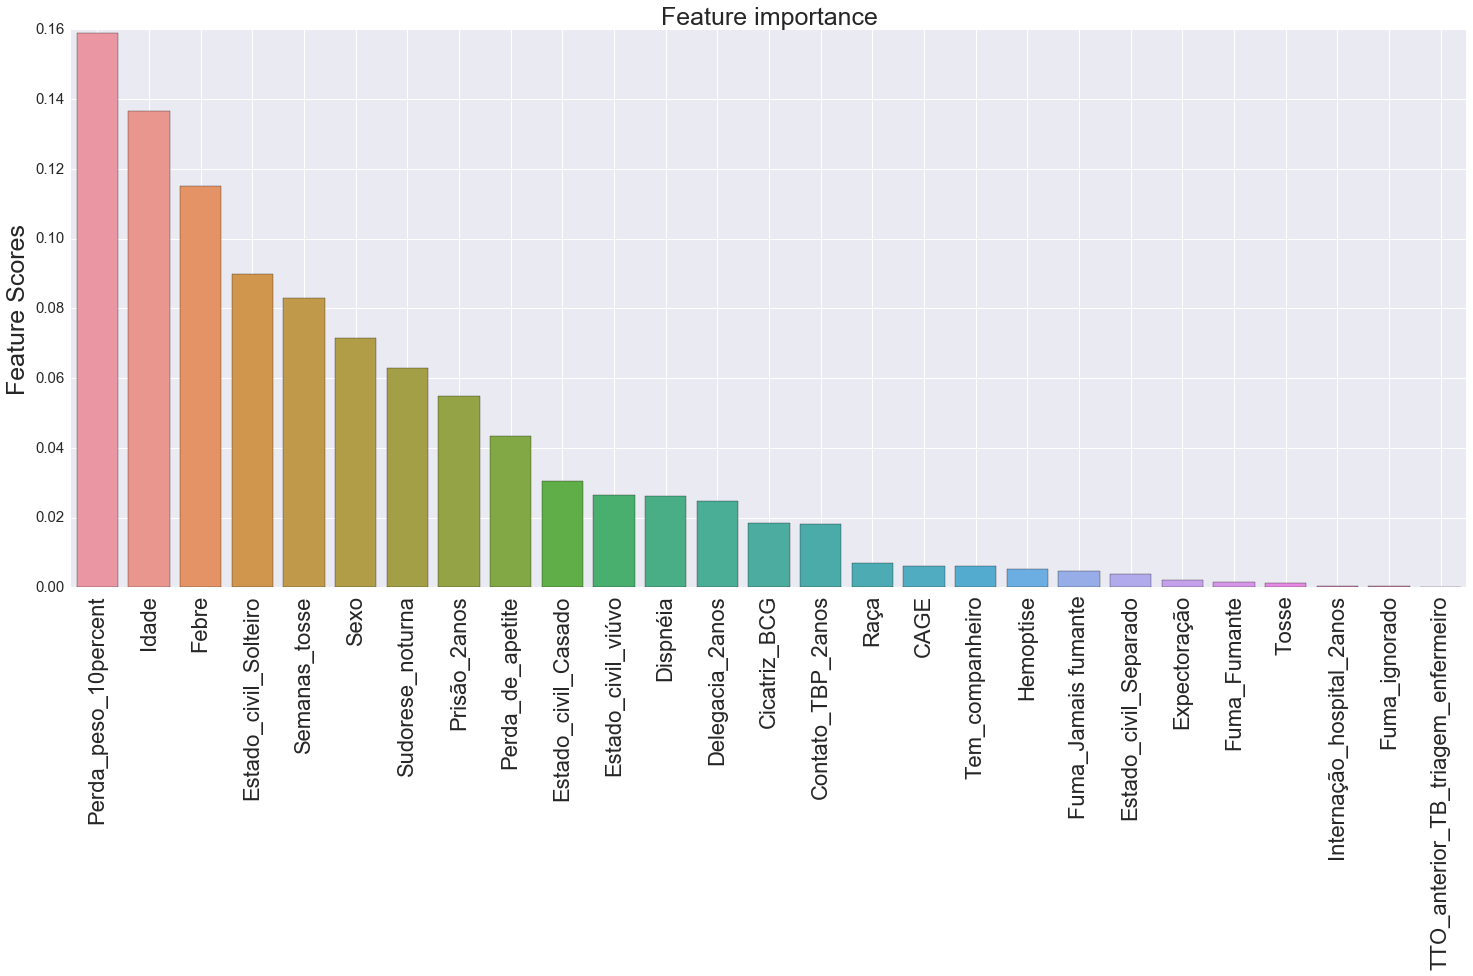

In [32]:
# Plotting
valores = zip(features_full,best) 
plt.figure(figsize=(25,10))
sns.barplot(*zip(*valores))
plt.xticks(rotation=90,fontsize=22)
plt.yticks(fontsize=15)
plt.title('Feature importance',fontsize=25)
plt.ylabel('Feature Scores',fontsize=25)
plt.grid(True)
plt.show()

In [33]:
# Importância acumulada
cumsum = np.cumsum(best)

In [35]:
for i in range(len(features_full)):
    print(features_full[i],cumsum[i])

Perda_peso_10percent 0.1589
Idade 0.2956
Febre 0.4107
Estado_civil_Solteiro 0.5004
Semanas_tosse 0.5834
Sexo 0.6549
Sudorese_noturna 0.7178
Prisão_2anos 0.7726
Perda_de_apetite 0.8159
Estado_civil_Casado 0.8465
Estado_civil_viúvo 0.8731
Dispnéia 0.8993
Delegacia_2anos 0.9241
Cicatriz_BCG 0.9425
Contato_TBP_2anos 0.9606
Raça 0.9675
CAGE 0.9736
Tem_companheiro 0.9796
Hemoptise 0.9848
Fuma_Jamais fumante 0.9896
Estado_civil_Separado 0.9933
Expectoração 0.9954
Fuma_Fumante 0.9969
Tosse 0.9982
Internação_hospital_2anos 0.9986
Internação_hospital_2anos 0.999
Internação_hospital_2anos 0.9994
Fuma_ignorado 0.9997
TTO_anterior_TB_triagem_enfermeiro 0.9998
TTO_anterior_TB_triagem_enfermeiro 0.9999
TTO_anterior_TB_triagem_enfermeiro 1.0


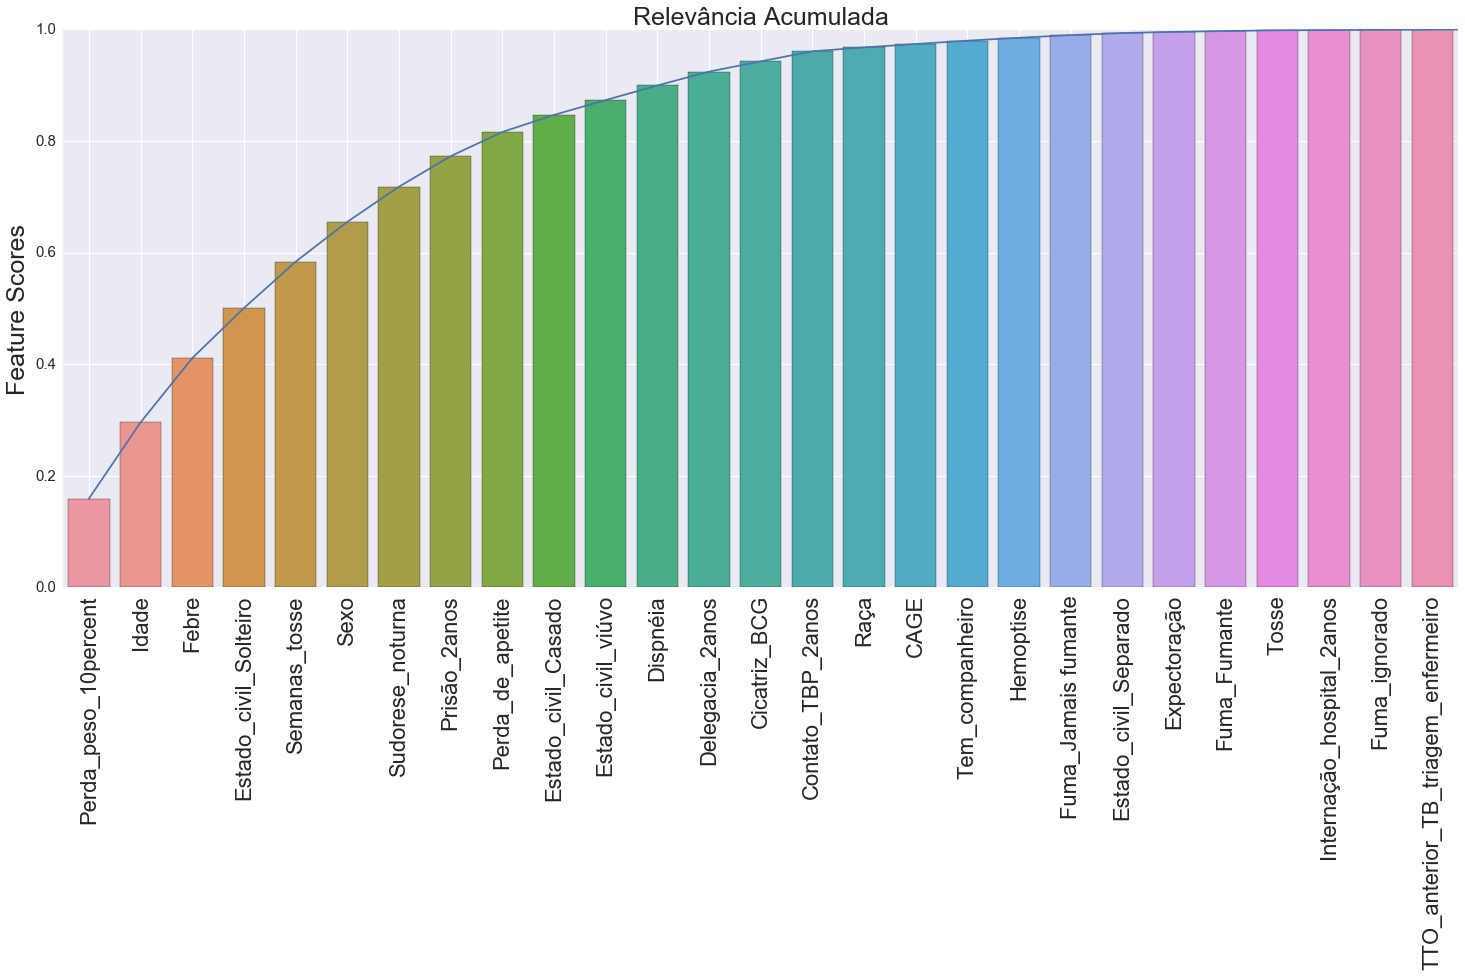

In [36]:
# Plotting
valores = zip(features_full,cumsum) 
plt.figure(figsize=(25,10))
sns.barplot(*zip(*valores))
plt.xticks(rotation=90,fontsize=22)
plt.yticks(fontsize=15)
plt.title('Relevância Acumulada',fontsize=25)
plt.ylabel('Feature Scores',fontsize=25)
plt.grid(True)
plt.hold(True)
plt.plot(cumsum)
plt.show()